# Crimes against Women in India (2001-2014)

Possible Questions to answer:
- Which year had the highest number of Rape cases?
- Which state had the highest rape cases?
- State wise distributions
- District wise distributions
- was there an increase in cases from 2001 to 2014?
- which district from each state had the highest and whihc year?
- histogram distribution thing


get the total values out first!

Description of the data set
- all the states data for 2001 followed by all the states data for 2002 and so on
- total values for each state is given within the year
- does not contain every single state in the country or every district (look into it)

Procedure:
First i got rid of the total values because it was resulting in double counting.
Created a seperate df for total values and then dropped them from the main df

DAY1: CLEAN THE DATA
- Main issues with the data set:
- total values in between the data set (solved)
- a & n islands and a&n islands despite being the same were counted seperately just like delhi ut and delhi and d&n haveli and d & n haveli (solved)
- dropping the districts because there are too many too varied and not all districts in the country have been counted


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("Crimes-against-women.csv")

In [3]:
df

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...
10672,Lakshadweep,Lakshadweep,2014,1,0,0,1,2,0,0
10673,Lakshadweep,TOTAL,2014,1,0,0,1,2,0,0
10674,Puducherry,Karaikal,2014,3,1,0,12,1,1,0
10675,Puducherry,Puducherry,2014,7,6,1,20,7,3,0


In [4]:
df.head()

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0


In [5]:
df.tail()

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
10672,Lakshadweep,Lakshadweep,2014,1,0,0,1,2,0,0
10673,Lakshadweep,TOTAL,2014,1,0,0,1,2,0,0
10674,Puducherry,Karaikal,2014,3,1,0,12,1,1,0
10675,Puducherry,Puducherry,2014,7,6,1,20,7,3,0
10676,Puducherry,TOTAL,2014,10,7,1,32,8,4,0


In [6]:
df.shape

(10677, 10)

In [7]:
df.sample(10)

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
7163,PUNJAB,KAPURTHALA,2010,12,22,2,14,0,31,0
3768,CHHATTISGARH,TOTAL,2006,995,178,103,1598,143,717,1
7918,ODISHA,KHURDA,2011,29,27,10,14,2,139,0
3107,JAMMU & KASHMIR,AWANTIPORA,2005,7,9,0,25,3,0,0
5551,MIZORAM,AIZAWL,2008,39,0,0,36,0,4,0
7009,MADHYA PRADESH,RATLAM,2010,88,23,16,145,32,94,0
38,ARUNACHAL PRADESH,SUBANSIRI LOWER,2001,2,5,0,4,0,0,0
5884,ANDHRA PRADESH,NALGONDA,2009,77,75,41,254,205,364,0
1345,UTTAR PRADESH,MATHURA,2002,16,32,29,40,45,94,0
7829,MAHARASHTRA,MUMBAI COMMR.,2011,221,166,14,553,162,393,0


In [8]:
df.dtypes

STATE/UT                                               object
DISTRICT                                               object
Year                                                    int64
Rape                                                    int64
Kidnapping and Abduction                                int64
Dowry Deaths                                            int64
Assault on women with intent to outrage her modesty     int64
Insult to modesty of Women                              int64
Cruelty by Husband or his Relatives                     int64
Importation of Girls                                    int64
dtype: object

In [9]:
df.columns

Index(['STATE/UT', 'DISTRICT', 'Year', 'Rape', 'Kidnapping and Abduction',
       'Dowry Deaths', 'Assault on women with intent to outrage her modesty',
       'Insult to modesty of Women', 'Cruelty by Husband or his Relatives',
       'Importation of Girls'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10677 entries, 0 to 10676
Data columns (total 10 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   STATE/UT                                             10677 non-null  object
 1   DISTRICT                                             10677 non-null  object
 2   Year                                                 10677 non-null  int64 
 3   Rape                                                 10677 non-null  int64 
 4   Kidnapping and Abduction                             10677 non-null  int64 
 5   Dowry Deaths                                         10677 non-null  int64 
 6   Assault on women with intent to outrage her modesty  10677 non-null  int64 
 7   Insult to modesty of Women                           10677 non-null  int64 
 8   Cruelty by Husband or his Relatives                  10677 non-null  int64 


In [11]:
df['STATE/UT']=df['STATE/UT'].str.lower()

In [12]:
df['STATE/UT'].unique()

array(['andhra pradesh', 'arunachal pradesh', 'assam', 'bihar',
       'chhattisgarh', 'goa', 'gujarat', 'haryana', 'himachal pradesh',
       'jammu & kashmir', 'jharkhand', 'karnataka', 'kerala',
       'madhya pradesh', 'maharashtra', 'manipur', 'meghalaya', 'mizoram',
       'nagaland', 'odisha', 'punjab', 'rajasthan', 'sikkim',
       'tamil nadu', 'tripura', 'uttar pradesh', 'uttarakhand',
       'west bengal', 'a & n islands', 'chandigarh', 'd & n haveli',
       'daman & diu', 'delhi', 'lakshadweep', 'puducherry', 'a&n islands',
       'd&n haveli', 'delhi ut', 'telangana'], dtype=object)

In [13]:
df["STATE/UT"].replace({"delhi ut": "delhi", "a&n islands": "a & n islands", "d&n haveli" :"d & n haveli"}, inplace=True)

In [14]:
df['STATE/UT'].unique()

array(['andhra pradesh', 'arunachal pradesh', 'assam', 'bihar',
       'chhattisgarh', 'goa', 'gujarat', 'haryana', 'himachal pradesh',
       'jammu & kashmir', 'jharkhand', 'karnataka', 'kerala',
       'madhya pradesh', 'maharashtra', 'manipur', 'meghalaya', 'mizoram',
       'nagaland', 'odisha', 'punjab', 'rajasthan', 'sikkim',
       'tamil nadu', 'tripura', 'uttar pradesh', 'uttarakhand',
       'west bengal', 'a & n islands', 'chandigarh', 'd & n haveli',
       'daman & diu', 'delhi', 'lakshadweep', 'puducherry', 'telangana'],
      dtype=object)

In [15]:
df['STATE/UT'].nunique()

36

Ladakh is missing and daman and diu and d and n haveli were combined in 2019

In [16]:
total_df = df[df.DISTRICT == 'TOTAL']

In [17]:
total_df

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
28,andhra pradesh,TOTAL,2001,871,765,420,3544,2271,5791,7
42,arunachal pradesh,TOTAL,2001,33,55,0,78,3,11,0
70,assam,TOTAL,2001,817,1070,59,850,4,1248,0
115,bihar,TOTAL,2001,888,518,859,562,21,1558,83
135,chhattisgarh,TOTAL,2001,959,171,70,1763,161,840,0
...,...,...,...,...,...,...,...,...,...,...
10648,d & n haveli,TOTAL,2014,5,7,0,2,1,6,0
10651,daman & diu,TOTAL,2014,2,1,0,3,0,1,0
10671,delhi,TOTAL,2014,2096,4034,153,4322,1361,3173,0
10673,lakshadweep,TOTAL,2014,1,0,0,1,2,0,0


In [18]:
total_df.sample(10)

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
9287,jammu & kashmir,TOTAL,2013,378,949,7,1389,354,428,0
8697,nagaland,TOTAL,2012,21,10,0,16,0,0,0
253,jharkhand,TOTAL,2001,567,279,217,297,5,484,2
4579,himachal pradesh,TOTAL,2007,159,150,8,322,33,342,0
8177,chandigarh,TOTAL,2011,27,46,2,21,12,46,0
885,gujarat,TOTAL,2002,267,807,62,750,104,3321,0
1853,manipur,TOTAL,2003,18,71,0,44,0,4,0
2192,andhra pradesh,TOTAL,2004,1016,1030,512,3817,2310,8388,2
578,tripura,TOTAL,2001,102,35,16,58,0,227,0
1294,tripura,TOTAL,2002,108,48,16,128,0,236,0


In [19]:
yeartotal_df=total_df.groupby('STATE/UT')[['Rape','Kidnapping and Abduction','Dowry Deaths','Assault on women with intent to outrage her modesty','Insult to modesty of Women','Cruelty by Husband or his Relatives','Importation of Girls']].sum()

In [20]:
yeartotal_df

,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
STATE/UT,,,,,,,
a & n islands,168,106,10,300,56,144,0
andhra pradesh,16075,17252,6922,63476,43482,140453,17
arunachal pradesh,658,735,3,998,24,238,0
assam,20095,31037,1634,19128,127,57650,11
bihar,15379,28543,16103,8479,347,34885,452
chandigarh,385,841,45,544,171,1040,0
chhattisgarh,14654,5904,1379,23548,1984,11718,6
d & n haveli,66,112,1,53,6,45,0
daman & diu,30,22,3,20,2,38,0


In [21]:
df=df[df["DISTRICT"].str.contains("TOTAL")==False]

In [22]:
year_df=df.groupby('Year')[['Rape','Kidnapping and Abduction','Dowry Deaths','Assault on women with intent to outrage her modesty','Insult to modesty of Women','Cruelty by Husband or his Relatives','Importation of Girls']].sum()

In [23]:
year_df

,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
Year,,,,,,,
2001,16075,14645,6851,34124,9746,49170,114
2002,16373,14506,6822,33943,10155,49237,76
2003,15847,13296,6208,32939,12325,50703,46
2004,18233,15578,7026,34567,10001,58121,89
2005,18359,15750,6787,34175,9984,58319,149
2006,19348,17414,7618,36617,9966,63128,67
2007,20737,20416,8093,38734,10950,75930,61
2008,21467,22939,8172,40413,12214,81344,67
2009,21397,25741,8383,38711,11009,89546,48


In [24]:
states_df=df.groupby('STATE/UT')[['Rape','Kidnapping and Abduction','Dowry Deaths','Assault on women with intent to outrage her modesty','Insult to modesty of Women','Cruelty by Husband or his Relatives','Importation of Girls']].sum()

In [25]:
states_df

,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
STATE/UT,,,,,,,
a & n islands,168,106,10,300,56,144,0
andhra pradesh,16075,17252,6922,63476,43482,140453,17
arunachal pradesh,658,735,3,998,24,238,0
assam,20095,31037,1634,19128,127,57650,11
bihar,15379,28543,16103,8479,347,34885,452
chandigarh,385,841,45,544,171,1040,0
chhattisgarh,14654,5904,1379,23548,1984,11718,6
d & n haveli,66,112,1,53,6,45,0
daman & diu,30,22,3,20,2,38,0


In [26]:
df

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,andhra pradesh,ADILABAD,2001,50,30,16,149,34,175,0
1,andhra pradesh,ANANTAPUR,2001,23,30,7,118,24,154,0
2,andhra pradesh,CHITTOOR,2001,27,34,14,112,83,186,0
3,andhra pradesh,CUDDAPAH,2001,20,20,17,126,38,57,0
4,andhra pradesh,EAST GODAVARI,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...
10669,delhi,Vigilance,2014,0,0,0,0,0,0,0
10670,delhi,West,2014,251,546,13,484,63,416,0
10672,lakshadweep,Lakshadweep,2014,1,0,0,1,2,0,0
10674,puducherry,Karaikal,2014,3,1,0,12,1,1,0


In [27]:
df.drop(labels="DISTRICT", axis=1)

,STATE/UT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,andhra pradesh,2001,50,30,16,149,34,175,0
1,andhra pradesh,2001,23,30,7,118,24,154,0
2,andhra pradesh,2001,27,34,14,112,83,186,0
3,andhra pradesh,2001,20,20,17,126,38,57,0
4,andhra pradesh,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...
10669,delhi,2014,0,0,0,0,0,0,0
10670,delhi,2014,251,546,13,484,63,416,0
10672,lakshadweep,2014,1,0,0,1,2,0,0
10674,puducherry,2014,3,1,0,12,1,1,0


In [43]:
year_df['Year'] = year_df.index
states_df['STATE/UT'] = states_df.index

<ipython-input-44-71c66e209eed>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


Text(0.5, 1.0, 'Total number Of Rapes in each year')

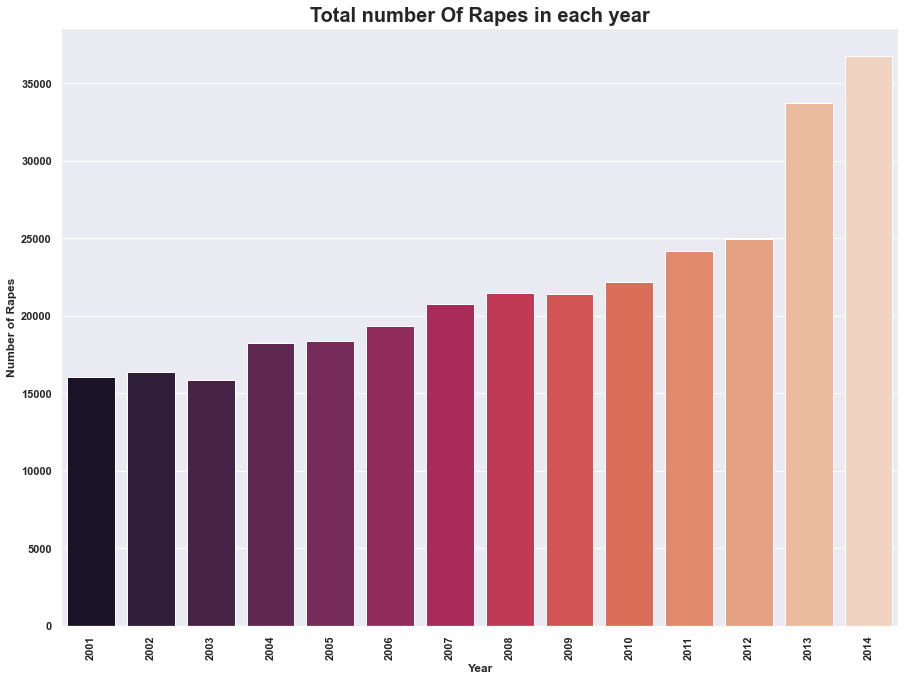

In [44]:
sns.set(rc={'figure.figsize':(15,11)})
ax=plt.axes()
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
sns.barplot(x="Year", y="Rape", palette="rocket", data=year_df)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Year",fontweight='bold')
plt.ylabel("Number of Rapes",fontweight='bold')
plt.title("Total number Of Rapes in each year",fontweight='bold',fontsize=20)

<ipython-input-46-5b9550ebc8cb>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


Text(0.5, 1.0, 'Statewise Distribution of Rapes in India')

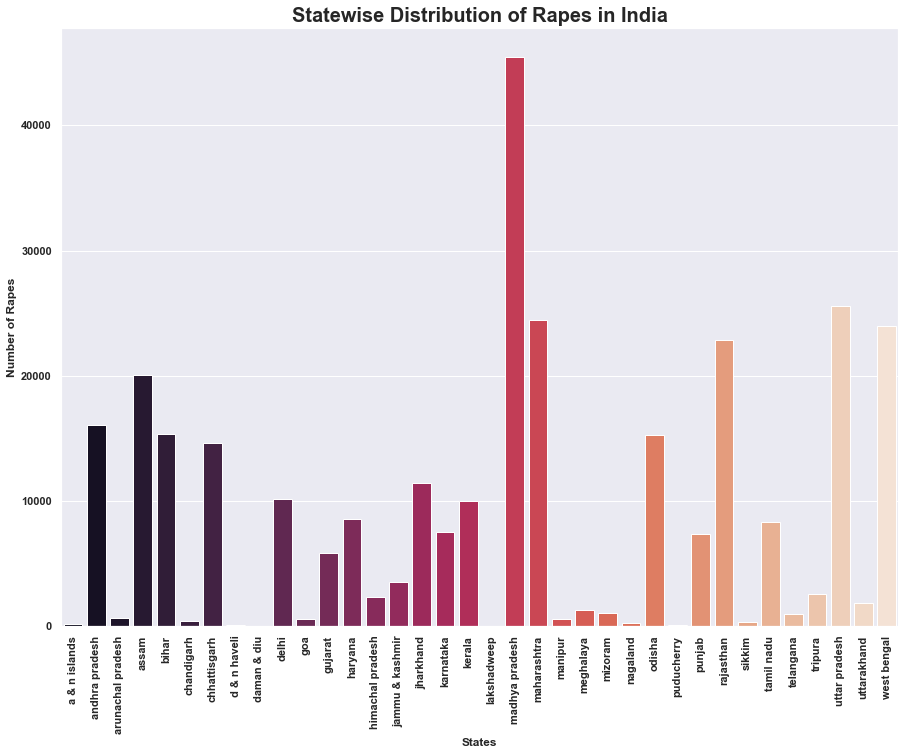

In [46]:
sns.set(rc={'figure.figsize':(15,11)})
ax=plt.axes()
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
sns.barplot(x="STATE/UT", y="Rape", palette="rocket", data=states_df)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("States",fontweight='bold')
plt.ylabel("Number of Rapes",fontweight='bold')
plt.title("Statewise Distribution of Rapes in India",fontweight='bold',fontsize=20)